In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import  *
from keras.applications import InceptionV3
from keras.layers import AveragePooling2D
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import  img_to_array
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import shuffle
import os
os.environ['TF_ENABLE_GPU_GARBAGE_COLLECTION']= 'false'

In [2]:
trainPath="/home/alp/Desktop/deep/Data/train"
testPath="/home/alp/Desktop/deep/Data/test"
valPath="/home/alp/Desktop/deep/Data/val"

In [3]:
trainDataGen=ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=0.3,
    zoom_range=0.3,
    shear_range=0.05,)
testDataGen=ImageDataGenerator(rescale=1./255)
valDataGen=ImageDataGenerator(rescale=1./255,validation_split=0.9999999999999)

trainGen=trainDataGen.flow_from_directory(
    trainPath,
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    seed = 131,
    batch_size=16,
    subset='training')

testGen=testDataGen.flow_from_directory(
    testPath,
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False,
    batch_size=1)

valGen=valDataGen.flow_from_directory(
    valPath,
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16,
    subset='validation')

print("Test",testGen.samples)
print("Train",trainGen.samples)
print("Validation",valGen.samples)
print(testGen.class_indices) 

Found 7364 images belonging to 4 classes.
Found 924 images belonging to 4 classes.
Found 916 images belonging to 4 classes.
Test 924
Train 7364
Validation 916
{'COVID-19': 0, 'Normal': 1, 'Pneumonia-Bacterial': 2, 'Pneumonia-Viral': 3}


In [ ]:
from tensorflow.keras.applications import InceptionV3
from keras.models import Model
base_model =  InceptionV3(weights='imagenet',input_shape=(299,299,3),include_top=False)
for layer in base_model.layers[0:150]:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512,activation='relu')(x)
out = Dense(4,activation='softmax')(x)
inc = Model(inputs=base_model.inputs,outputs=out)
inc.summary()
print(len(inc.layers))
for layer in inc.layers:
  print(layer.name,layer.trainable)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_470 (Conv2D)            (None, 149, 149, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_470 (Batch  (None, 149, 149, 32  96         ['conv2d_470[0][0]']             
 Normalization)                 )                                                           

In [ ]:
from keras.callbacks import ModelCheckpoint
callback=ModelCheckpoint(filepath="best_model.h5",monitor='val_loss',save_best_only=True)
inc.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history=inc.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//16,
    validation_data=valGen,
    epochs=45,
    validation_steps=valGen.samples//16,
    callbacks=callback
)

Epoch 1/45
460/460 [==============================] - 113s 237ms/step - loss: 0.4073 - accuracy: 0.8292 - val_loss: 0.3845 - val_accuracy: 0.8421
Epoch 2/45
460/460 [==============================] - 107s 232ms/step - loss: 0.3750 - accuracy: 0.8455 - val_loss: 0.4469 - val_accuracy: 0.8300
Epoch 3/45
460/460 [==============================] - 106s 230ms/step - loss: 0.3562 - accuracy: 0.8570 - val_loss: 0.4511 - val_accuracy: 0.8432
Epoch 4/45
460/460 [==============================] - 106s 231ms/step - loss: 0.3275 - accuracy: 0.8630 - val_loss: 0.8355 - val_accuracy: 0.8015
Epoch 5/45
460/460 [==============================] - 108s 235ms/step - loss: 0.3166 - accuracy: 0.8631 - val_loss: 0.3707 - val_accuracy: 0.8651
Epoch 6/45
460/460 [==============================] - 109s 236ms/step - loss: 0.3059 - accuracy: 0.8753 - val_loss: 0.3301 - val_accuracy: 0.8575
Epoch 7/45
460/460 [==============================] - 106s 230ms/step - loss: 0.2804 - accuracy: 0.8836 - val_loss: 0.4034 -

In [ ]:
scores=inc.evaluate(testGen,batch_size=1)
print("Loss:",scores[0])
print("Accuracy:",scores[1]*100)

924/924 [==============================] - 18s 19ms/step - loss: 0.3340 - accuracy: 0.9167
Loss: 0.3340112864971161
Accuracy: 91.66666865348816


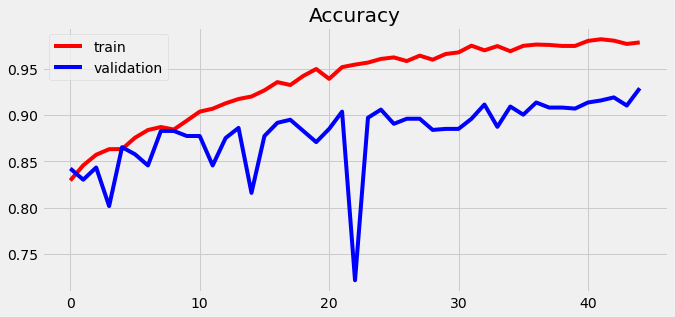

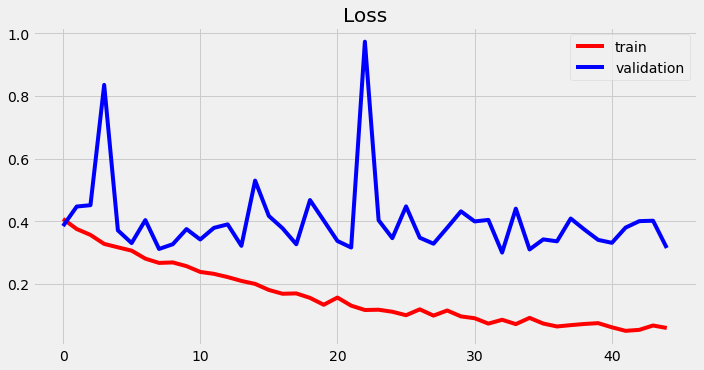

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       129
           1       0.97      0.99      0.98       327
           2       0.89      0.89      0.89       301
           3       0.80      0.75      0.78       167

    accuracy                           0.92       924
   macro avg       0.91      0.91      0.91       924
weighted avg       0.92      0.92      0.92       924

[[128   0   1   0]
 [  0 324   0   3]
 [  0   3 269  29]
 [  0   8  33 126]]


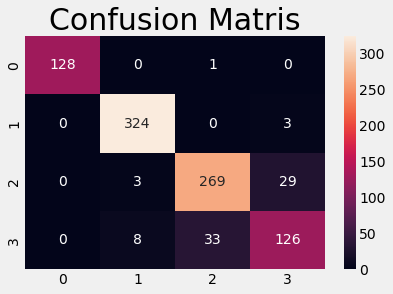

In [ ]:
Y_pred = inc.predict_generator(testGen,testGen.samples // 1+1)
y_pred = np.argmax(Y_pred, axis=1)
categories = ["0", "1","2","3"]
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(testGen.classes, y_pred, target_names=categories))
conf = confusion_matrix(testGen.classes,y_pred) 
print(conf)
import seaborn as sns
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf, annot = True,fmt="d")
plt.show()


In [ ]:
from tensorflow.keras.applications import InceptionV3
from keras.models import Model
base_model =  InceptionV3(weights='imagenet',input_shape=(299,299,3),include_top=False)
for layer in base_model.layers[0:150]:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32,activation='relu')(x)
out = Dense(4,activation='softmax')(x)
inc2 = Model(inputs=base_model.inputs,outputs=out)
inc2.summary()
print(len(inc2.layers))
for layer in inc2.layers:
  print(layer.name,layer.trainable)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_564 (Conv2D)            (None, 149, 149, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_564 (Batch  (None, 149, 149, 32  96         ['conv2d_564[0][0]']             
 Normalization)                 )                                                           

In [ ]:
from keras.callbacks import ModelCheckpoint
callback2=ModelCheckpoint(filepath="best_model_1.h5",monitor='val_loss',save_best_only=True)
inc2.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history=inc2.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//16,
    validation_data=valGen,
    epochs=45,
    validation_steps=valGen.samples//16,
    callbacks=callback2
)

Epoch 1/45
460/460 [==============================] - 250s 537ms/step - loss: 0.5186 - accuracy: 0.7896 - val_loss: 0.5113 - val_accuracy: 0.8158
Epoch 2/45
460/460 [==============================] - 125s 272ms/step - loss: 0.4060 - accuracy: 0.8363 - val_loss: 0.5259 - val_accuracy: 0.7928
Epoch 3/45
460/460 [==============================] - 112s 243ms/step - loss: 0.3870 - accuracy: 0.8390 - val_loss: 0.8891 - val_accuracy: 0.7489
Epoch 4/45
460/460 [==============================] - 120s 260ms/step - loss: 0.3549 - accuracy: 0.8504 - val_loss: 0.3394 - val_accuracy: 0.8684
Epoch 5/45
460/460 [==============================] - 111s 241ms/step - loss: 0.3275 - accuracy: 0.8576 - val_loss: 0.4274 - val_accuracy: 0.8498
Epoch 6/45
460/460 [==============================] - 107s 233ms/step - loss: 0.3204 - accuracy: 0.8655 - val_loss: 0.3376 - val_accuracy: 0.8662
Epoch 7/45
460/460 [==============================] - 111s 242ms/step - loss: 0.3020 - accuracy: 0.8677 - val_loss: 0.3126 -

In [ ]:
scores2=inc2.evaluate(testGen,batch_size=1)
print("Loss:",scores2[0])
print("Accuracy:",scores2[1]*100)

924/924 [==============================] - 15s 16ms/step - loss: 0.3232 - accuracy: 0.9177
Loss: 0.32324376702308655
Accuracy: 91.77489280700684


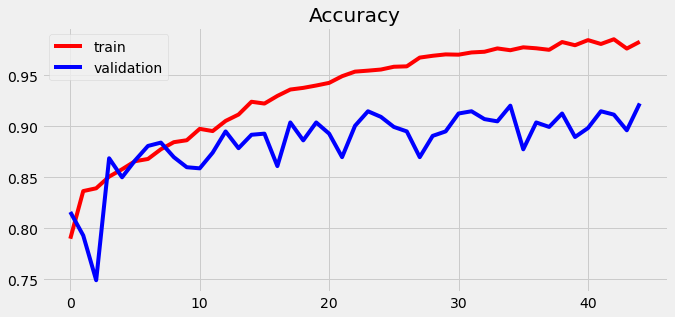

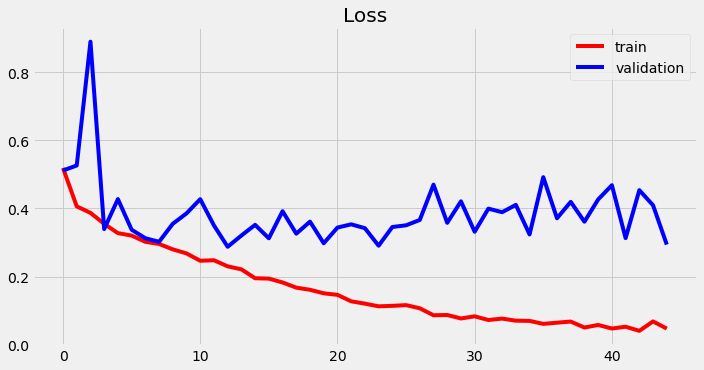

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       0.97      0.98      0.98       327
           2       0.91      0.87      0.89       301
           3       0.77      0.80      0.79       167

    accuracy                           0.92       924
   macro avg       0.91      0.92      0.91       924
weighted avg       0.92      0.92      0.92       924

[[129   0   0   0]
 [  0 322   0   5]
 [  0   3 263  35]
 [  0   7  26 134]]


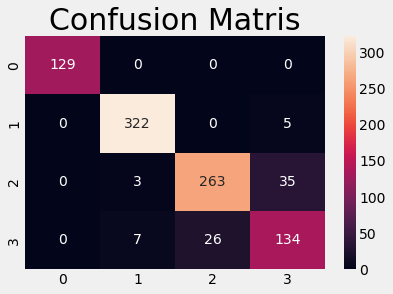

In [ ]:
Y_pred_2 = inc2.predict_generator(testGen,testGen.samples // 1+1)
y_pred_2 = np.argmax(Y_pred_2, axis=1)
categories = ["0", "1","2","3"]
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(testGen.classes, y_pred_2, target_names=categories))
conf_2 = confusion_matrix(testGen.classes,y_pred_2) 
print(conf_2)
import seaborn as sns
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf_2, annot = True,fmt="d")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("f1-score:",f1_score(testGen.classes,y_pred_2,average='macro'))
print("precision:",precision_score(testGen.classes,y_pred_2,average='macro'))
print("accuracy:",accuracy_score(testGen.classes,y_pred_2))
print("recall:",recall_score(testGen.classes,y_pred_2,average='macro'))

f1-score: 0.9136718542879276
precision: 0.9125072656692873
accuracy: 0.9177489177489178
recall: 0.9152147106317706


In [ ]:
from tensorflow.keras.applications import InceptionV3
from keras.models import Model
base_model =  InceptionV3(weights='imagenet',input_shape=(299,299,3),include_top=False)
for layer in base_model.layers[0:100]:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32,activation='relu')(x)
out = Dense(4,activation='softmax')(x)
inc3 = Model(inputs=base_model.inputs,outputs=out)
inc3.summary()
print(len(inc3.layers))
for layer in inc3.layers:
  print(layer.name,layer.trainable)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_658 (Conv2D)            (None, 149, 149, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_658 (Batch  (None, 149, 149, 32  96         ['conv2d_658[0][0]']             
 Normalization)                 )                                                           

In [ ]:
from keras.callbacks import ModelCheckpoint
callback3=ModelCheckpoint(filepath="best_model_2.h5",monitor='val_loss',save_best_only=True)
inc3.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history=inc3.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//16,
    validation_data=valGen,
    epochs=45,
    validation_steps=valGen.samples//16,
    callbacks=callback3
)

Epoch 1/45
460/460 [==============================] - 119s 249ms/step - loss: 0.5460 - accuracy: 0.7797 - val_loss: 1.0000 - val_accuracy: 0.7873
Epoch 2/45
460/460 [==============================] - 114s 247ms/step - loss: 0.4275 - accuracy: 0.8209 - val_loss: 0.4045 - val_accuracy: 0.8509
Epoch 3/45
460/460 [==============================] - 111s 242ms/step - loss: 0.3802 - accuracy: 0.8409 - val_loss: 0.4779 - val_accuracy: 0.8333
Epoch 4/45
460/460 [==============================] - 106s 231ms/step - loss: 0.3667 - accuracy: 0.8481 - val_loss: 0.4576 - val_accuracy: 0.8081
Epoch 5/45
460/460 [==============================] - 109s 236ms/step - loss: 0.3498 - accuracy: 0.8504 - val_loss: 0.3377 - val_accuracy: 0.8651
Epoch 6/45
460/460 [==============================] - 111s 241ms/step - loss: 0.3412 - accuracy: 0.8538 - val_loss: 0.3255 - val_accuracy: 0.8662
Epoch 7/45
460/460 [==============================] - 108s 234ms/step - loss: 0.3138 - accuracy: 0.8661 - val_loss: 0.3762 -

In [ ]:
scores3=inc3.evaluate(testGen,batch_size=1)
print("Loss:",scores3[0])
print("Accuracy:",scores3[1]*100)

924/924 [==============================] - 15s 16ms/step - loss: 0.3715 - accuracy: 0.9091
Loss: 0.3714984655380249
Accuracy: 90.90909361839294


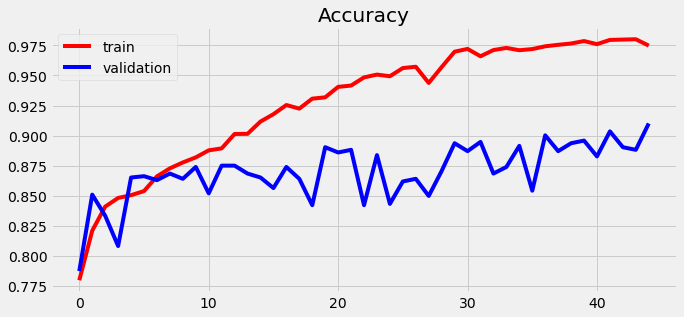

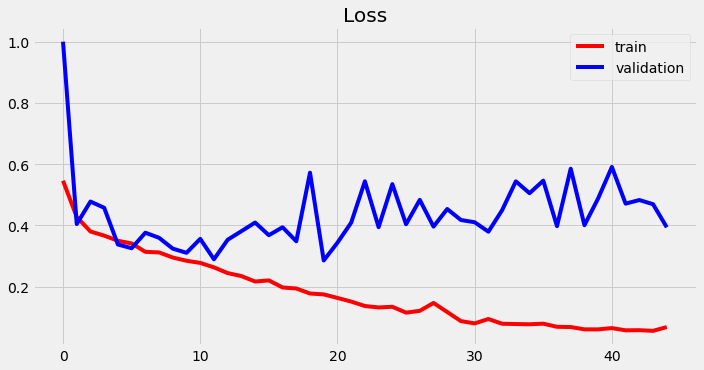

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       0.96      0.99      0.97       327
           2       0.91      0.84      0.88       301
           3       0.74      0.80      0.77       167

    accuracy                           0.91       924
   macro avg       0.90      0.91      0.91       924
weighted avg       0.91      0.91      0.91       924

[[129   0   0   0]
 [  0 324   0   3]
 [  0   4 254  43]
 [  0  10  24 133]]


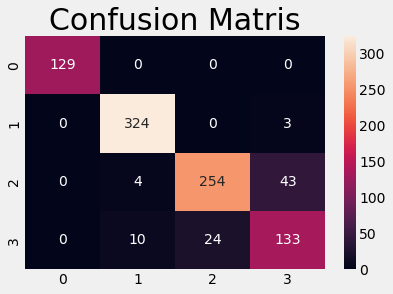

In [ ]:
Y_pred_3 = inc3.predict_generator(testGen,testGen.samples // 1+1)
y_pred_3 = np.argmax(Y_pred_3, axis=1)
categories = ["0", "1","2","3"]
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(testGen.classes, y_pred_3, target_names=categories))
conf_3 = confusion_matrix(testGen.classes,y_pred_3) 
print(conf_3)
import seaborn as sns
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf_3, annot = True,fmt="d")
plt.show()

In [ ]:
from tensorflow.keras.applications import InceptionV3
from keras.models import Model
base_model =  InceptionV3(weights='imagenet',input_shape=(299,299,3),include_top=False)
for layer in base_model.layers[0:150]:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512,activation='relu')(x)
x = Dense(512,activation='relu')(x)
out = Dense(4,activation='softmax')(x)
inc4 = Model(inputs=base_model.inputs,outputs=out)
inc4.summary()
print(len(inc4.layers))
for layer in inc4.layers:
  print(layer.name,layer.trainable)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_846 (Conv2D)            (None, 149, 149, 32  864         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_846 (Batch  (None, 149, 149, 32  96         ['conv2d_846[0][0]']             
 Normalization)                 )                                                           

In [ ]:
from keras.callbacks import ModelCheckpoint
callback4=ModelCheckpoint(filepath="best_model_16.h5",monitor='val_loss',save_best_only=True)
inc4.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history=inc4.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//16,
    validation_data=valGen,
    epochs=45,
    validation_steps=valGen.samples//16,
    callbacks=callback4
)

Epoch 1/45
460/460 [==============================] - 117s 247ms/step - loss: 0.5961 - accuracy: 0.7580 - val_loss: 0.8902 - val_accuracy: 0.7752
Epoch 2/45
460/460 [==============================] - 113s 245ms/step - loss: 0.4347 - accuracy: 0.8243 - val_loss: 0.3804 - val_accuracy: 0.8498
Epoch 3/45
460/460 [==============================] - 108s 236ms/step - loss: 0.3902 - accuracy: 0.8386 - val_loss: 0.3694 - val_accuracy: 0.8476
Epoch 4/45
460/460 [==============================] - 107s 233ms/step - loss: 0.3766 - accuracy: 0.8416 - val_loss: 0.3508 - val_accuracy: 0.8564
Epoch 5/45
460/460 [==============================] - 107s 233ms/step - loss: 0.3574 - accuracy: 0.8515 - val_loss: 0.3337 - val_accuracy: 0.8640
Epoch 6/45
460/460 [==============================] - 105s 228ms/step - loss: 0.3426 - accuracy: 0.8604 - val_loss: 0.3735 - val_accuracy: 0.8607
Epoch 7/45
460/460 [==============================] - 106s 231ms/step - loss: 0.3186 - accuracy: 0.8662 - val_loss: 0.3127 -

In [ ]:
scores4=inc4.evaluate(testGen,batch_size=1)
print("Loss:",scores4[0])
print("Accuracy:",scores4[1]*100)

924/924 [==============================] - 14s 16ms/step - loss: 0.3402 - accuracy: 0.9004
Loss: 0.34017398953437805
Accuracy: 90.04328846931458


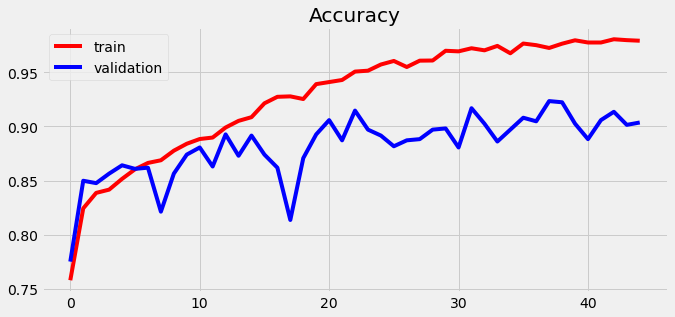

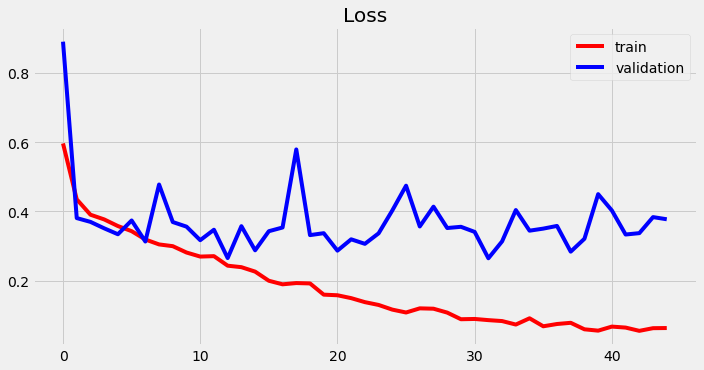

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       129
           1       0.92      0.99      0.96       327
           2       0.91      0.85      0.88       301
           3       0.75      0.74      0.74       167

    accuracy                           0.90       924
   macro avg       0.90      0.89      0.89       924
weighted avg       0.90      0.90      0.90       924

[[128   0   0   1]
 [  0 325   0   2]
 [  0   7 256  38]
 [  0  20  24 123]]


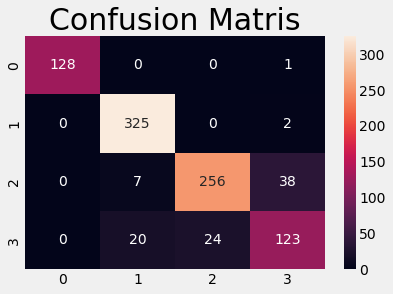

In [ ]:
Y_pred_4 = inc4.predict_generator(testGen,testGen.samples // 1+1)
y_pred_4 = np.argmax(Y_pred_4, axis=1)
categories = ["0", "1","2","3"]
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(testGen.classes, y_pred_4, target_names=categories))
conf_4 = confusion_matrix(testGen.classes,y_pred_4) 
print(conf_4)
import seaborn as sns
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf_4, annot = True,fmt="d")
plt.show()

In [4]:
from tensorflow.keras.applications import InceptionV3
from keras.models import Model
base_model =  InceptionV3(weights='imagenet',input_shape=(299,299,3),include_top=False)
for layer in base_model.layers[0:150]:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32,activation='relu')(x)
out = Dense(4,activation='softmax')(x)
inc5 = Model(inputs=base_model.inputs,outputs=out)
inc5.summary()
print(len(inc5.layers))
for layer in inc5.layers:
  print(layer.name,layer.trainable)

2022-06-19 22:58:56.110423: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 22:58:56.813859: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 22:58:56.814678: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 22:58:56.821655: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [5]:
from keras.callbacks import ModelCheckpoint
callback5=ModelCheckpoint(filepath="best_model_21.h5",monitor='val_loss',save_best_only=True)
inc5.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history=inc5.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//16,
    validation_data=valGen,
    epochs=45,
    validation_steps=valGen.samples//16,
    callbacks=callback5
)

Epoch 1/45


2022-06-19 22:59:15.693698: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200


460/460 [==============================] - 331s 670ms/step - loss: 0.5697 - accuracy: 0.7782 - val_loss: 0.5228 - val_accuracy: 0.8103
Epoch 2/45
460/460 [==============================] - 109s 236ms/step - loss: 0.4297 - accuracy: 0.8258 - val_loss: 0.3408 - val_accuracy: 0.8553
Epoch 3/45
460/460 [==============================] - 108s 235ms/step - loss: 0.3940 - accuracy: 0.8338 - val_loss: 0.6511 - val_accuracy: 0.8169
Epoch 4/45
460/460 [==============================] - 106s 231ms/step - loss: 0.3723 - accuracy: 0.8451 - val_loss: 0.3545 - val_accuracy: 0.8575
Epoch 5/45
460/460 [==============================] - 108s 235ms/step - loss: 0.3660 - accuracy: 0.8488 - val_loss: 0.3063 - val_accuracy: 0.8772
Epoch 6/45
460/460 [==============================] - 106s 231ms/step - loss: 0.3349 - accuracy: 0.8602 - val_loss: 0.5704 - val_accuracy: 0.7730
Epoch 7/45
460/460 [==============================] - 106s 229ms/step - loss: 0.3340 - accuracy: 0.8553 - val_loss: 0.3108 - val_accura

In [6]:
scores5=inc5.evaluate(testGen,batch_size=1)
print("Loss:",scores5[0])
print("Accuracy:",scores5[1]*100)

924/924 [==============================] - 17s 18ms/step - loss: 0.3660 - accuracy: 0.9123
Loss: 0.3660149574279785
Accuracy: 91.23376607894897


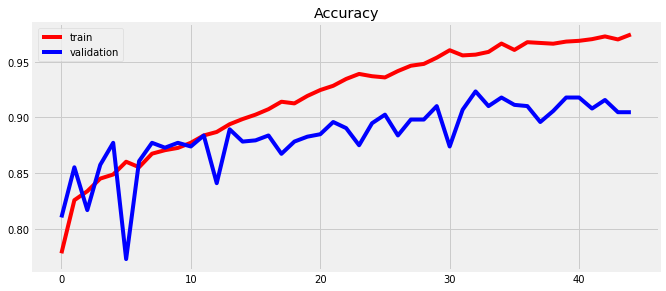

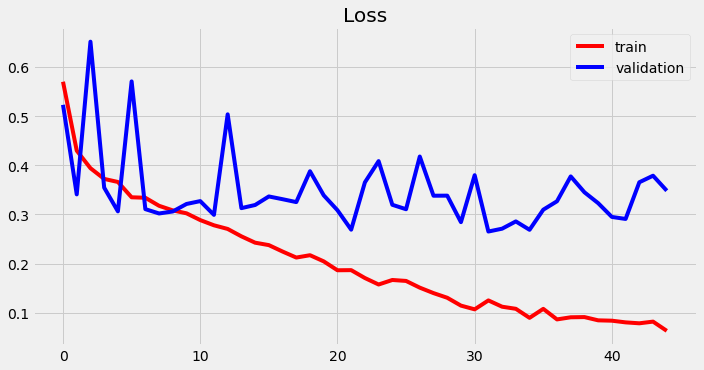

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       129
           1       0.96      0.98      0.97       327
           2       0.88      0.90      0.89       301
           3       0.81      0.74      0.77       167

    accuracy                           0.91       924
   macro avg       0.91      0.90      0.91       924
weighted avg       0.91      0.91      0.91       924

[[127   1   1   0]
 [  0 321   2   4]
 [  0   4 271  26]
 [  0   8  35 124]]


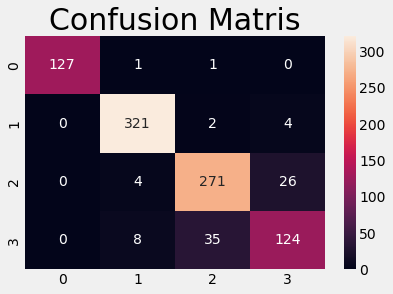

In [8]:
Y_pred_5 = inc5.predict_generator(testGen,testGen.samples // 1+1)
y_pred_5 = np.argmax(Y_pred_5, axis=1)
categories = ["0", "1","2","3"]
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(testGen.classes, y_pred_5, target_names=categories))
conf_5 = confusion_matrix(testGen.classes,y_pred_5) 
print(conf_5)
import seaborn as sns
plt.title('Confusion Matris', fontsize = 30)
sns.heatmap(conf_5, annot = True,fmt="d")
plt.show()

In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("f1-score:",f1_score(testGen.classes,y_pred_5,average='macro'))
print("precision:",precision_score(testGen.classes,y_pred_5,average='macro'))
print("accuracy:",accuracy_score(testGen.classes,y_pred_5))
print("recall:",recall_score(testGen.classes,y_pred_5,average='macro'))

f1-score: 0.9061383582920641
precision: 0.9108238258069663
accuracy: 0.9123376623376623
recall: 0.9022486740378246


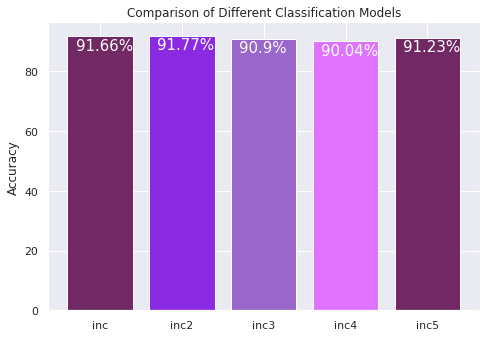

In [3]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['inc','inc2','inc3','inc4','inc5']
inc=91.66
inc2=91.77
inc3=90.9
inc4=90.04
inc5=91.23376607894897
Accuracy=[inc,inc2,inc3,inc4,inc5]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2','#9966cc','#df73ff'])
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-4.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
plt.title('Comparison of Different Classification Models')
plt.ylabel('Accuracy')
plt.show()